Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 02. Neutron Diffusion from a Plane Source
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Natural/Natural Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. ["Plane Source in a Symmetric Infinite Domain"](#sym-case)
   + [Data](#data-sym)
   + [Finite Element Lagrange Basis Functions](#fembf-sym)
   + [Results](#results-sym)
1. ["Plane Source in an Unsymmetric Infinite Domain"](#unsym-case)
   + [Data](#data-unsym)
   + [Finite Element Lagrange Basis Functions](#fembf-unsym)
   + [Results](#results-unsym)
1. ["Plane Source" in a Finite Domain w/ Vacuum Boundary](#vac-case)
   + [Data](#data-vac)
   + [Finite Element Lagrange Basis Functions](#fembf-vac)
   + [Results](#results-vac)
---

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, Cartesian coordinates, neutron diffusion from a plane source problem using multiple regions.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[s,b]\subset\Reals\rightarrow\Reals$, $u_2:[-s,s]\subset\Reals\rightarrow\Reals$, $u_3:[a,-s]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\bigl(-D_1\, u_1'\bigr)'(x) - \Sigma_{a,1}\,u_1(x) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad x\in\ ]s,b[, \\
 -\bigl(-D_2\, u_2'\bigr)'(x) - \Sigma_{a,2}\,u_2(x) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad x\in\ ]-s,s[, \\
 -\bigl(-D_3\, u_3'\bigr)'(x) - \Sigma_{a,3}\,u_3(x) + s_0^{(3)} &= 0 \quad\quad \forall \quad\quad x\in\ ]a,-s[, \\
 q_{3,n}(a) &= q_{3,na}, \\
 q_{1,n}(b) &= q_{1,nb}, \\
 u_1(s) &= u_2(s), \\
 u_3(-s) &= u_2(-s), \\
 q_{1,n}(s) &= q_{2,n}(s), \\
 q_{3,n}(-s) &= q_{2,n}(-s), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(x) = \flux_i(x)\cdot\normal(x) = -D_i\,u_i'(x)\,\ihat \cdot \normal(x) \ \forall \ i=1,2,3$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)'(x) - \Sigma_a(x)\,u(x) + s_0(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 q_n(a) &= q_{na}, \\
 q_n(b) &= q_{nb}, \\
\end{align*}
   
Given data: diffusion coefficient, $D(x)$, macroscopic absorption cross section, $\Sigma_a(x)$, source $s_0(x)$, and normal flux boundary conditions. Where $q_n(x) = \flux(x)\cdot\normal(x) = -D(x)\,u_i'(x)\,\ihat \cdot \normal(x)$.

## [Galerkin Method (or Rayleigh-Ritz) w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([a,b]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) + q_n(a)\,v(a) + q_n(b)\,v(b) &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([a,b]\bigr), 
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional
subspace of $H^1\!\bigl([a,b]\bigr)$, say $V_N([a,b]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([a,b]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $
  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm).

## ["Plane Source in a Symmetric Infinte Domain"](#toc)<a id="sym-case"></a>

Consider a "thin" planar source surrounded by two identical material regions. The domains extend far away from source. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(\infty) &= 0, \\
 q_n(-\infty) &= 0.
\end{align*}

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
x_a = -80*unit.cm  # infinity
x_b = +80*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [3]:
'''Domain'''

def show_domain(x_a, x_s, x_b, zoom=3):
    import pyvista as pv
    pv.set_plot_theme('paraview')
    h = 25
    source = pv.Box((-x_s,x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_right = pv.Box((x_s,x_b,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_left = pv.Box((x_a,-x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    
    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(source, color='red', opacity=1.0,)
    plo.add_mesh(mat_right, color='green', opacity=0.5)
    plo.add_mesh(mat_left, color='tan', opacity=0.5)
    plo.add_axes(xlabel='X', ylabel='Y', zlabel='Z')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(zoom)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [4]:
plo = show_domain(x_a, x_s, x_b)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

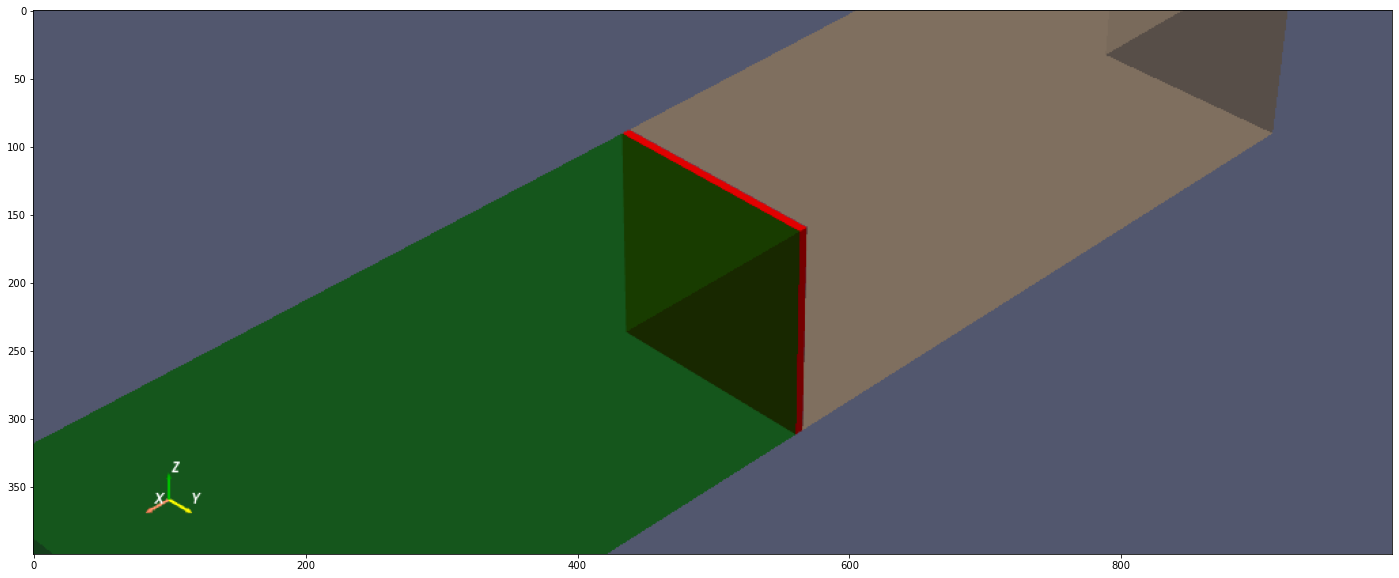

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-sym"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$
> + $q_{na}$, $q_{nb}$


In [6]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.01/unit.cm
source_3 = 0./unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.0*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

# Left normal flux
q_na = 0.0*unit.cm**2/unit.second
# Right normal flux
q_nb = 0.0*unit.cm**2/unit.second

In [7]:
print('s_2 [#/cm^3-s] = ', source_2*unit.cm**3*unit.second)

s_2 [#/cm^3-s] =  1.0000000000000002


In [8]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))
diffusion_length_3 = math.sqrt(diffusion_coeff_3/sigma_a_3)
print('L3 [cm] = %2.3e'%(diffusion_length_3/unit.cm))

L1 [cm] = 1.000e+01
L2 [cm] = 1.732e+01
L3 [cm] = 1.000e+01


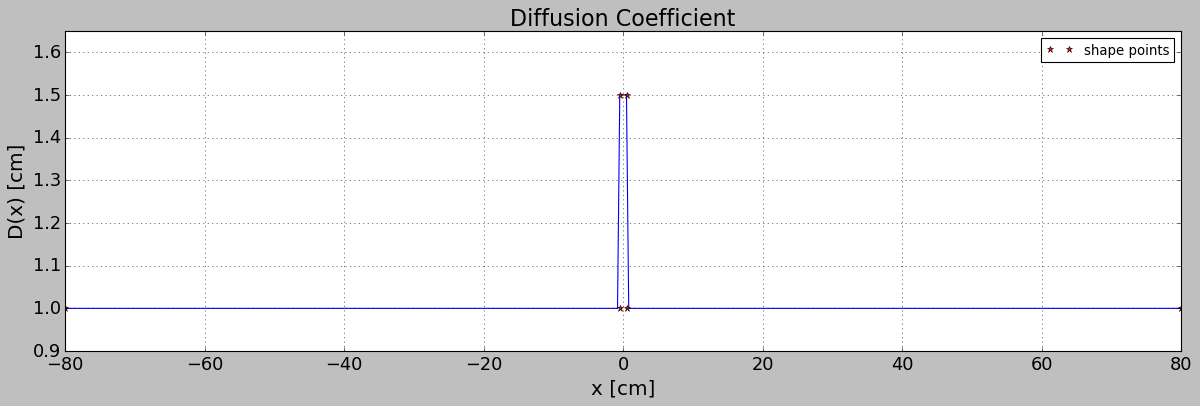

In [9]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

shape_pts = [(x_a, diffusion_coeff_3), (-x_s, diffusion_coeff_3), 
             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

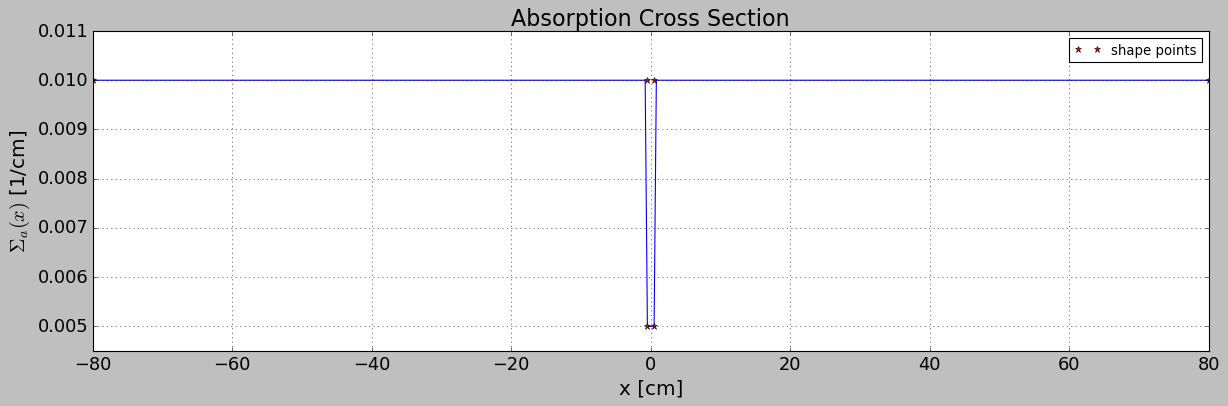

In [10]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

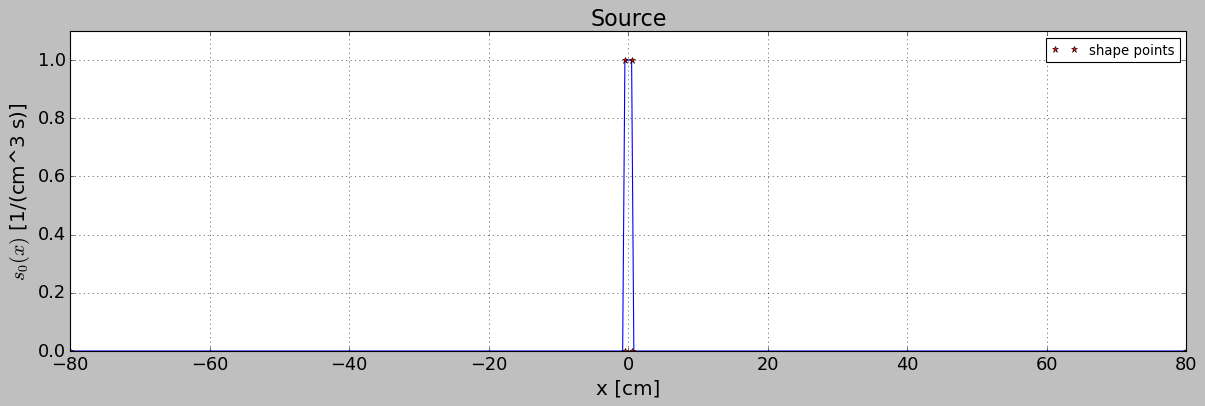

In [11]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-sym"></a>

Specify basis functions distribution on the material domain and degree.

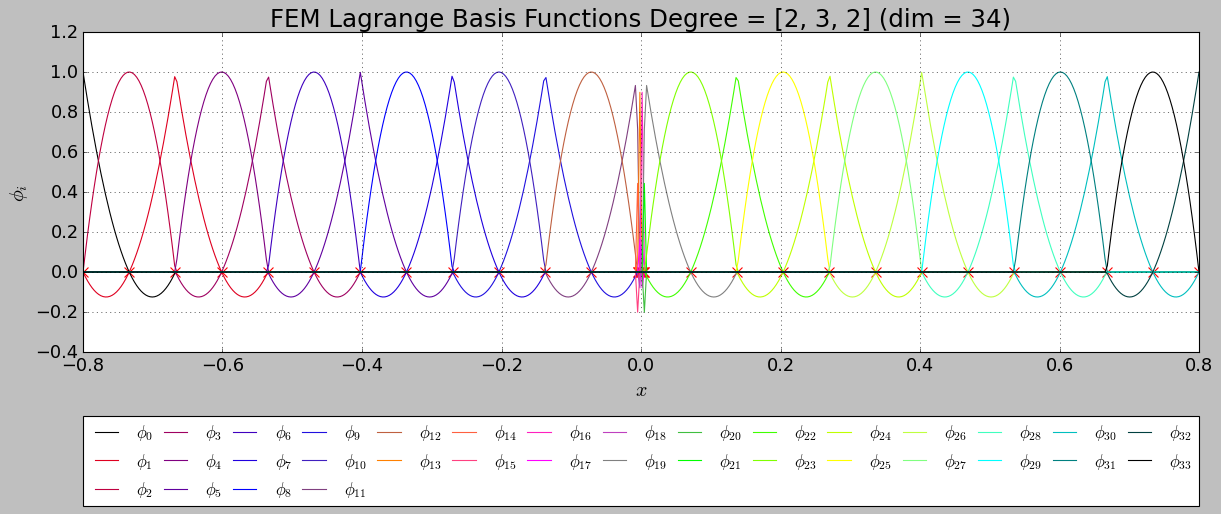

In [12]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [6,3,6] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [13]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx

In [14]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$

In [15]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
qa_vec = femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')
qb_vec = femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

b_vec = s_vec - qa_vec - qb_vec

In [16]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [17]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [18]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results-sym"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

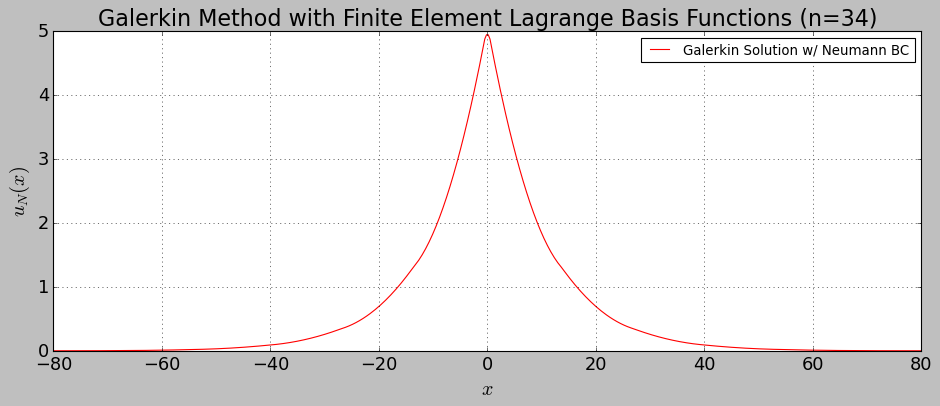

In [19]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label='Galerkin Solution w/ Neumann BC')

plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [20]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [0.0035]   u^*_N(b) [cm^2/s]=  [0.0035]
u^*'_N(a) [cm/s]=  [-0.30278]  u^*'_N(b) [cm/s]=  [0.30278]
u^*_N(0) [cm^2/s]=  [4.94937]
u^*'_N(0) [cm/s]=  [-1.38438e-10]


For an infinitesimally thin source (class notes), the limit obtained is $\phi_{1} (0) = \frac{s_0^"}{2}\,\frac{L_1}{D_1}$.

In [21]:
'''Error on u_1(0) for a thin source'''

phi_1_0 = source_2_two_prime/2*diffusion_length_1/diffusion_coeff_1
print('(u_star(0)-phi_1(0)) relative error [%]= ', abs(u_star(0)-phi_1_0)/phi_1_0*100)

(u_star(0)-phi_1(0)) relative error [%]=  [1.01269]


In [22]:
u_star(0)/phi_1_0

array([0.98987])

In [23]:
phi_1_0

50000.0

This shows how close the value of $u$ at the origin is to the limiting case of a thin source (class notes).

For an infinitesimally thin source, the limit obtained is $q_{1n}(0) =  \frac{s_0^"}{2}$.

In [24]:
'''Error on q_n1(0) for a thin source'''

q_1_n_0 = - source_2_two_prime/2
print('(q_1n(0)-q_1n_thin(0)) relative error [%]= ', abs(-(-diffusion_coeff_1*u_prime_star(0))-q_1_n_0)/q_1_n_0*100)

(q_1n(0)-q_1n_thin(0)) relative error [%]=  [-100.]


This shows how close the value of $q_{1n}$ at the origin is to the limiting case of a thin source (class notes). This limit cannot be reproduced, hence the large error.

In [25]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', q_na)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  0.0
q_na computed [cm2/s]=  [-3.02781e-05]


In [26]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', q_nb)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-3.02781e-05]


In [27]:
x_vec = np.linspace(x_a, x_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-8.00000e+01   +3.49795e-03     +3.02781e-05
-7.58974e+01   +3.75042e-03     -1.53357e-04
-7.17949e+01   +4.75627e-03     -3.36993e-04
-6.76923e+01   +6.51549e-03     -5.20629e-04
-6.35897e+01   +9.09458e-03     -8.67976e-04
-5.94872e+01   +1.37920e-02     -1.42204e-03
-5.53846e+01   +2.07626e-02     -1.97610e-03
-5.12821e+01   +2.99489e-02     -2.90659e-03
-4.71795e+01   +4.60624e-02     -4.94872e-03
-4.30769e+01   +7.05538e-02     -6.99086e-03
-3.89744e+01   +1.02497e-01     -9.17857e-03
-3.48718e+01   +1.55844e-01     -1.68281e-02
-3.07692e+01   +2.40574e-01     -2.44777e-02
-2.66667e+01   +3.54974e-01     -2.78453e-02
-2.25641e+01   +5.28058e-01     -5.65329e-02
-1.84615e+01   +8.18834e-01     -8.52205e-02
-1.43590e+01   +1.22730e+00     -1.13908e-01
-1.02564e+01   +1.79234e+00     -1.87319e-01
-6.15385e+00   +2.78153e+00     -2.94913e-01
-2.05128e+00   +4.21213e+00     -4.02506e-01
+2.05128e+00   +4.21213e+00     +4.02506e-01
+6.15385

In [28]:
x_vec

array([-0.8    , -0.75897, -0.71795, -0.67692, -0.6359 , -0.59487,
       -0.55385, -0.51282, -0.47179, -0.43077, -0.38974, -0.34872,
       -0.30769, -0.26667, -0.22564, -0.18462, -0.14359, -0.10256,
       -0.06154, -0.02051,  0.02051,  0.06154,  0.10256,  0.14359,
        0.18462,  0.22564,  0.26667,  0.30769,  0.34872,  0.38974,
        0.43077,  0.47179,  0.51282,  0.55385,  0.59487,  0.6359 ,
        0.67692,  0.71795,  0.75897,  0.8    ])

In [29]:
u_n_vec

array([3.49795e-03, 3.75042e-03, 4.75627e-03, 6.51549e-03, 9.09458e-03,
       1.37920e-02, 2.07626e-02, 2.99489e-02, 4.60624e-02, 7.05538e-02,
       1.02497e-01, 1.55844e-01, 2.40574e-01, 3.54974e-01, 5.28058e-01,
       8.18834e-01, 1.22730e+00, 1.79234e+00, 2.78153e+00, 4.21213e+00,
       4.21213e+00, 2.78153e+00, 1.79234e+00, 1.22730e+00, 8.18834e-01,
       5.28058e-01, 3.54974e-01, 2.40574e-01, 1.55844e-01, 1.02497e-01,
       7.05538e-02, 4.60624e-02, 2.99489e-02, 2.07626e-02, 1.37920e-02,
       9.09458e-03, 6.51549e-03, 4.75627e-03, 3.75042e-03, 3.49795e-03])

In [30]:
q_N_vec

array([ 3.02781e-05, -1.53357e-04, -3.36993e-04, -5.20629e-04,
       -8.67976e-04, -1.42204e-03, -1.97610e-03, -2.90659e-03,
       -4.94872e-03, -6.99086e-03, -9.17857e-03, -1.68281e-02,
       -2.44777e-02, -2.78453e-02, -5.65329e-02, -8.52205e-02,
       -1.13908e-01, -1.87319e-01, -2.94913e-01, -4.02506e-01,
        4.02506e-01,  2.94913e-01,  1.87319e-01,  1.13908e-01,
        8.52205e-02,  5.65329e-02,  2.78453e-02,  2.44777e-02,
        1.68281e-02,  9.17857e-03,  6.99086e-03,  4.94872e-03,
        2.90659e-03,  1.97610e-03,  1.42204e-03,  8.67976e-04,
        5.20629e-04,  3.36993e-04,  1.53357e-04, -3.02781e-05])

In [31]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-sym-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')

## ["Plane Source in an Unsymmetric Infinite Domain"](#toc)<a id="unsym-case"></a>

Consider a "thin" planar source surrounded by two different material regions. The domains extend far away from source. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(\infty) &= 0, \\
 q_n(-\infty) &= 0.
\end{align*}

In [32]:
'''Domain'''
x_a = -80*unit.cm  # infinity
x_b = +80*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [33]:
plo = show_domain(x_a, x_s, x_b)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

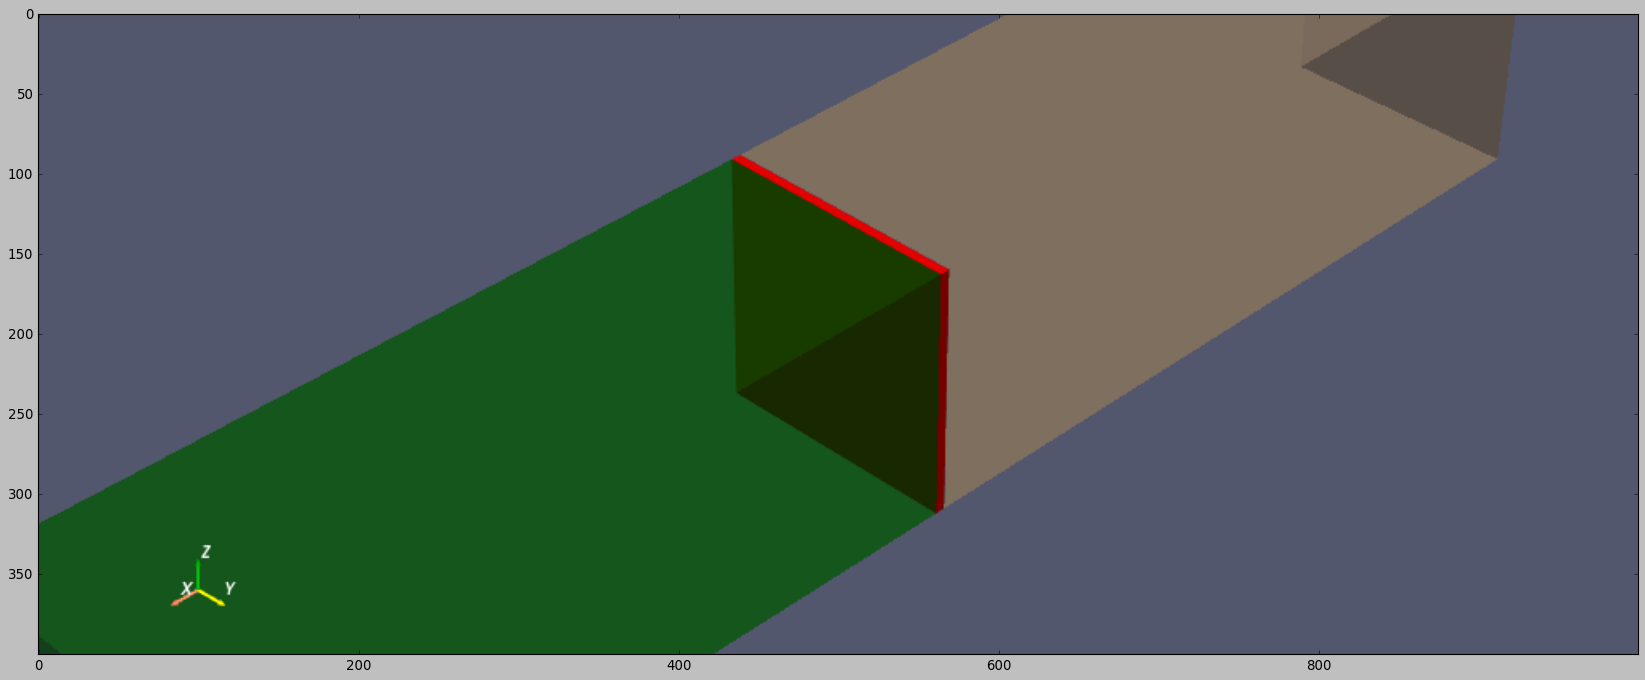

In [34]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-unsym"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$
> + $q_{na}$, $q_{nb}$


In [35]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.04/unit.cm
source_3 = 0.1/unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.4*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

# Left normal flux
q_na = 0.0*unit.cm**2/unit.second
# Right normal flux
q_nb = 0.0*unit.cm**2/unit.second

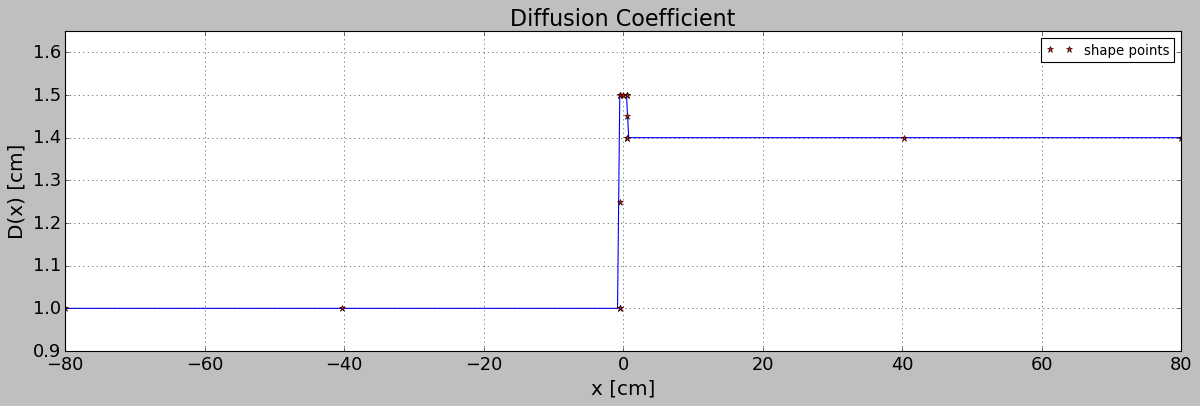

In [36]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

a = np.linspace(x_a, -x_s, 3)
a_pts = [(x, diffusion_coeff_3) for x in a]

b = np.linspace(diffusion_coeff_3, diffusion_coeff_2, 3)
b_pts = [(-x_s, y) for y in b]

c = np.linspace(-x_s, x_s, 3)
c_pts = [(x, diffusion_coeff_2) for x in c]

d = np.linspace(diffusion_coeff_2, diffusion_coeff_1, 3)
d_pts = [(x_s, y) for y in d]

e = np.linspace(x_s, x_b, 3)
e_pts = [(x, diffusion_coeff_1) for x in e]

shape_pts = a_pts + b_pts + c_pts + d_pts + e_pts

#shape_pts = [(x_a, diffusion_coeff_3), ((x_a-x_s)/2, diffusion_coeff_3),  (-x_s, diffusion_coeff_3), 
#             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
#             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

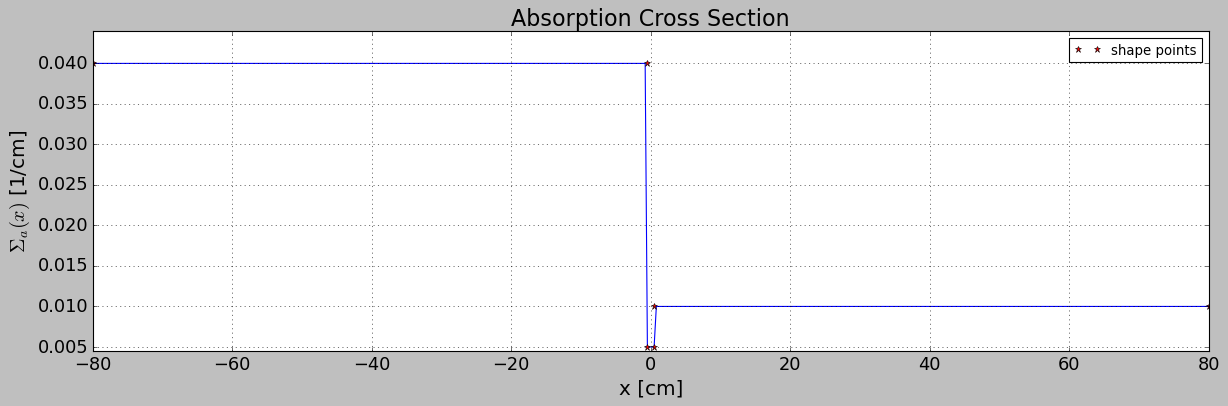

In [37]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

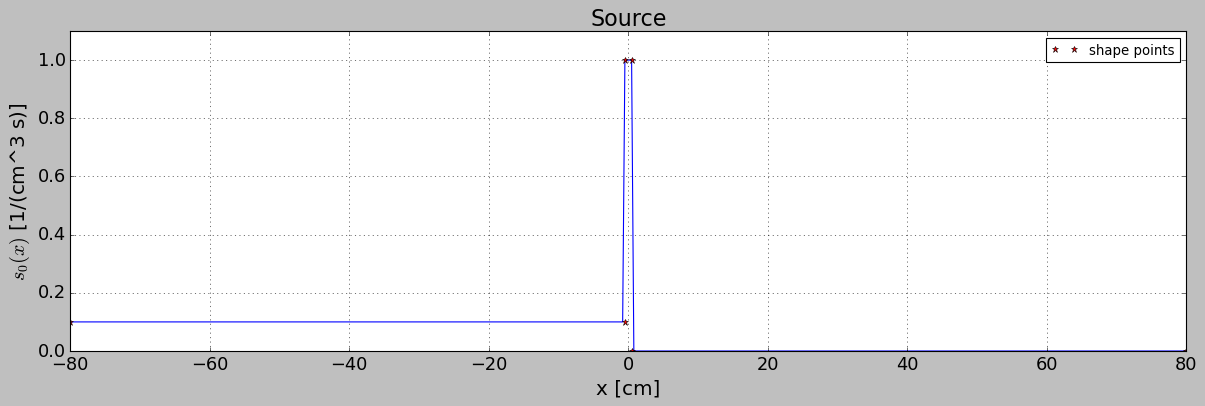

In [38]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-unsym"></a>

Specify basis functions distribution on the material domain and degree.

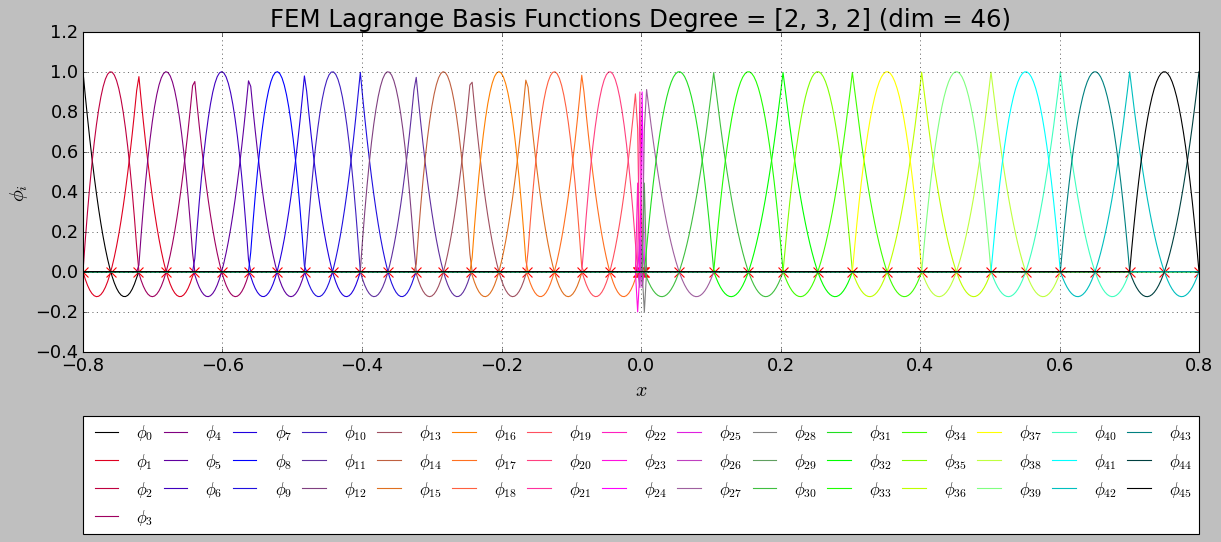

In [39]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [10,3,8] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [40]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx

In [41]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$

In [42]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
qa_vec = femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')
qb_vec = femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

b_vec = s_vec - qa_vec - qb_vec

In [43]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-unsym"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

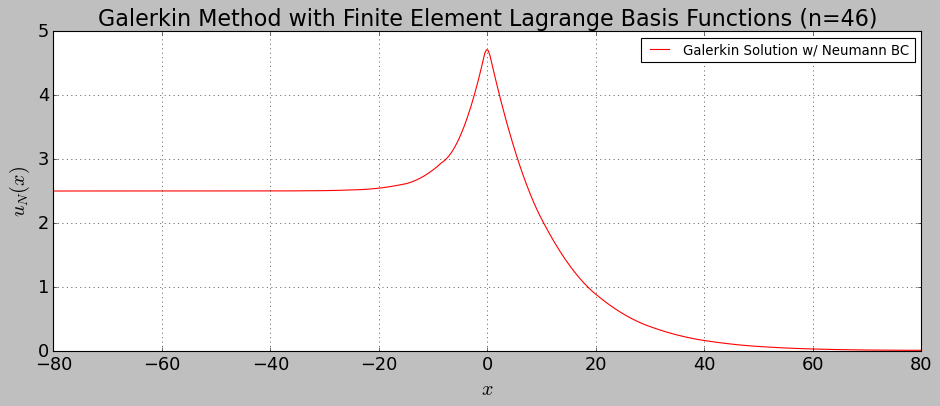

In [44]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label='Galerkin Solution w/ Neumann BC')

plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [45]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [2.5]   u^*_N(b) [cm^2/s]=  [0.01116]
u^*'_N(a) [cm/s]=  [-0.00018]  u^*'_N(b) [cm/s]=  [0.19504]
u^*_N(0) [cm^2/s]=  [4.70982]
u^*'_N(0) [cm/s]=  [-381.6292]


In [46]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', q_na)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  0.0
q_na computed [cm2/s]=  [-1.80681e-08]


In [47]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', q_nb)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-2.7306e-05]


In [48]:
x_vec = np.linspace(x_a, x_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec/unit.cm, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-8.00000e+01   +2.50000e+00     +1.80681e-08
-7.58974e+01   +2.50000e+00     -1.15886e-07
-7.17949e+01   +2.50000e+00     -1.83805e-07
-6.76923e+01   +2.50000e+00     -7.29041e-07
-6.35897e+01   +2.50001e+00     -1.10528e-06
-5.94872e+01   +2.50002e+00     -3.73585e-06
-5.53846e+01   +2.50004e+00     -6.18196e-06
-5.12821e+01   +2.50009e+00     -1.89746e-05
-4.71795e+01   +2.50019e+00     -3.39458e-05
-4.30769e+01   +2.50046e+00     -9.61781e-05
-3.89744e+01   +2.50096e+00     -1.83966e-04
-3.48718e+01   +2.50234e+00     -4.86712e-04
-3.07692e+01   +2.50492e+00     -9.86541e-04
-2.66667e+01   +2.51199e+00     -2.45933e-03
-2.25641e+01   +2.52523e+00     -5.24486e-03
-1.84615e+01   +2.56145e+00     -1.24096e-02
-1.43590e+01   +2.62955e+00     -2.76826e-02
-1.02564e+01   +2.81462e+00     -6.25376e-02
-6.15385e+00   +3.16592e+00     -1.45214e-01
-2.05128e+00   +4.10949e+00     -3.14776e-01
+2.05128e+00   +4.05737e+00     +4.74255e-01
+6.15385

In [49]:
x_vec

array([-0.8    , -0.75897, -0.71795, -0.67692, -0.6359 , -0.59487,
       -0.55385, -0.51282, -0.47179, -0.43077, -0.38974, -0.34872,
       -0.30769, -0.26667, -0.22564, -0.18462, -0.14359, -0.10256,
       -0.06154, -0.02051,  0.02051,  0.06154,  0.10256,  0.14359,
        0.18462,  0.22564,  0.26667,  0.30769,  0.34872,  0.38974,
        0.43077,  0.47179,  0.51282,  0.55385,  0.59487,  0.6359 ,
        0.67692,  0.71795,  0.75897,  0.8    ])

In [50]:
u_n_vec

array([2.5    , 2.5    , 2.5    , 2.5    , 2.50001, 2.50002, 2.50004,
       2.50009, 2.50019, 2.50046, 2.50096, 2.50234, 2.50492, 2.51199,
       2.52523, 2.56145, 2.62955, 2.81462, 3.16592, 4.10949, 4.05737,
       2.85291, 2.01904, 1.43231, 1.00459, 0.71741, 0.5035 , 0.35789,
       0.25293, 0.17784, 0.12701, 0.08921, 0.06382, 0.04531, 0.03245,
       0.02378, 0.01767, 0.01398, 0.01182, 0.01116])

In [51]:
q_N_vec

array([ 1.80681e-08, -1.15886e-07, -1.83805e-07, -7.29041e-07,
       -1.10528e-06, -3.73585e-06, -6.18196e-06, -1.89746e-05,
       -3.39458e-05, -9.61781e-05, -1.83966e-04, -4.86712e-04,
       -9.86541e-04, -2.45933e-03, -5.24486e-03, -1.24096e-02,
       -2.76826e-02, -6.25376e-02, -1.45214e-01, -3.14776e-01,
        4.74255e-01,  3.47789e-01,  2.21322e-01,  1.73271e-01,
        1.18649e-01,  8.47922e-02,  6.11996e-02,  4.09162e-02,
        3.07223e-02,  2.05285e-02,  1.51039e-02,  1.06912e-02,
        7.28225e-03,  5.35319e-03,  3.42412e-03,  2.52663e-03,
        1.63969e-03,  9.87933e-04,  4.80314e-04, -2.73060e-05])

In [52]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-unsym-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')

## ["Plane Source" in a Finite Domain w/ Vacuum Boundary](#toc)<a id="vac-case"></a>

Consider a source with finite thickness surrounded by two different material regions exposed to vacuum. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(a) &= \frac{u}{2}, \\
 q_n(b) &= \frac{u}{2}.
\end{align*}

In [53]:
'''Domain'''
x_a = -25*unit.cm  # infinity
x_b = +25*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [54]:
plo = show_domain(x_a, x_s, x_b, zoom=1.5)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

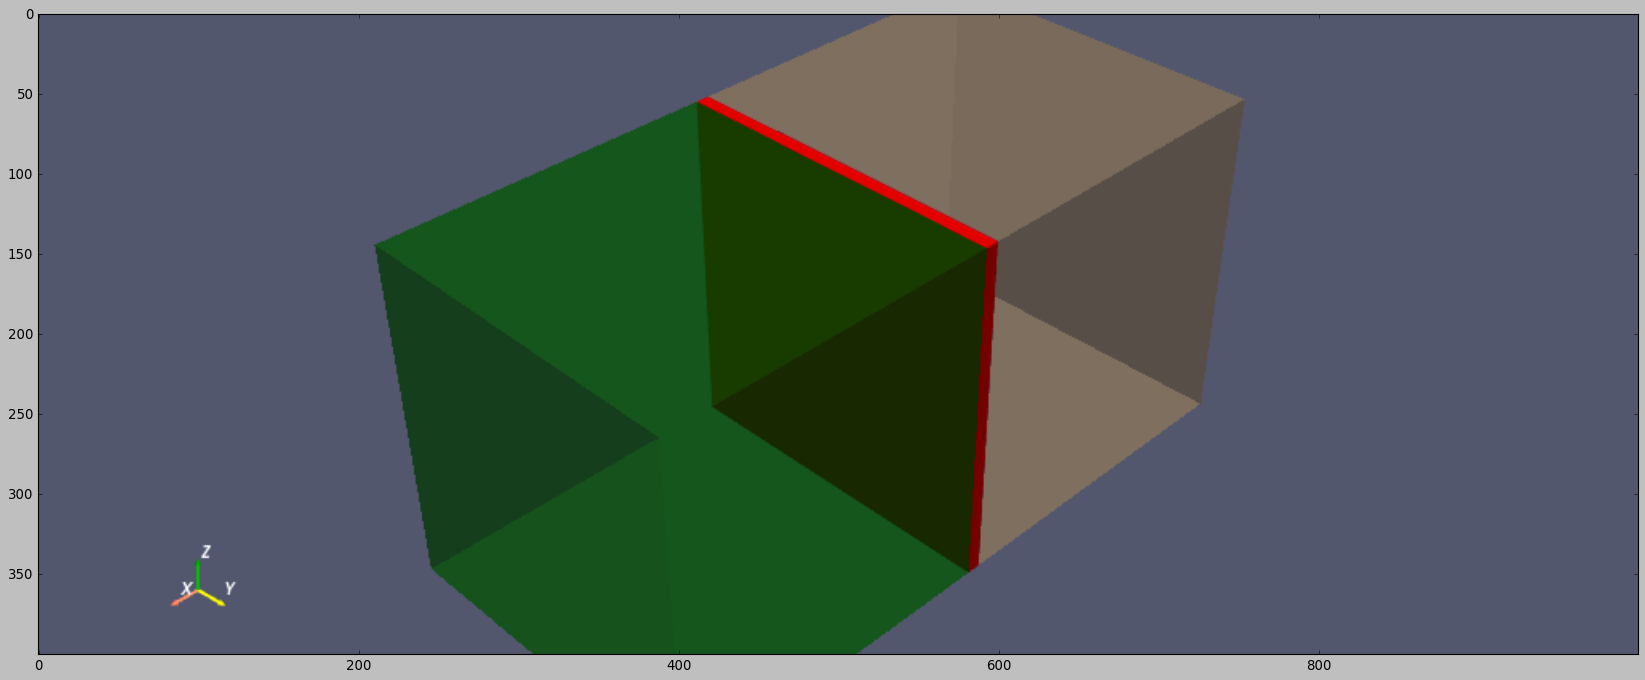

In [55]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-vac"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$


In [56]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.04/unit.cm
source_3 = 0.1/unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.4*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

In [57]:
print('s_2 [#/cm^3-s] = ', source_2*unit.cm**3*unit.second)

s_2 [#/cm^3-s] =  1.0000000000000002


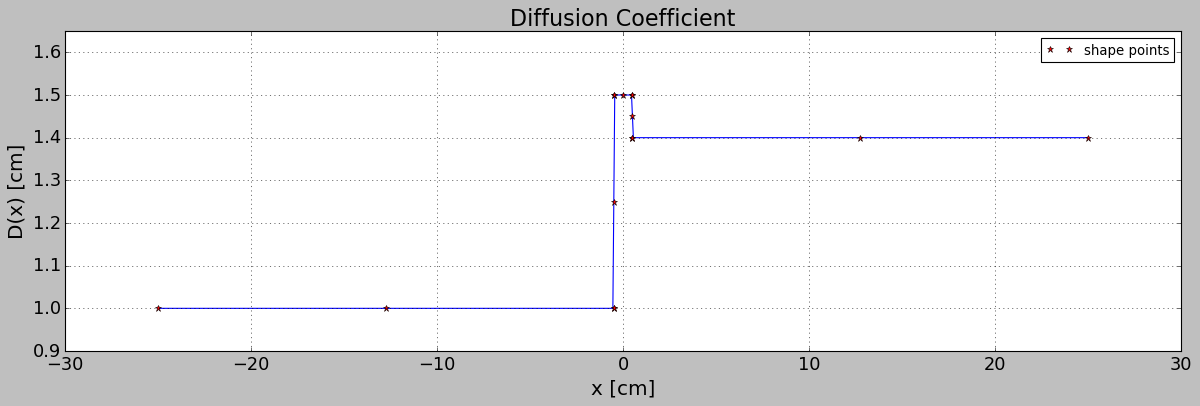

In [58]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

a = np.linspace(x_a, -x_s, 3)
a_pts = [(x, diffusion_coeff_3) for x in a]

b = np.linspace(diffusion_coeff_3, diffusion_coeff_2, 3)
b_pts = [(-x_s, y) for y in b]

c = np.linspace(-x_s, x_s, 3)
c_pts = [(x, diffusion_coeff_2) for x in c]

d = np.linspace(diffusion_coeff_2, diffusion_coeff_1, 3)
d_pts = [(x_s, y) for y in d]

e = np.linspace(x_s, x_b, 3)
e_pts = [(x, diffusion_coeff_1) for x in e]

shape_pts = a_pts + b_pts + c_pts + d_pts + e_pts

#shape_pts = [(x_a, diffusion_coeff_3), ((x_a-x_s)/2, diffusion_coeff_3),  (-x_s, diffusion_coeff_3), 
#             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
#             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

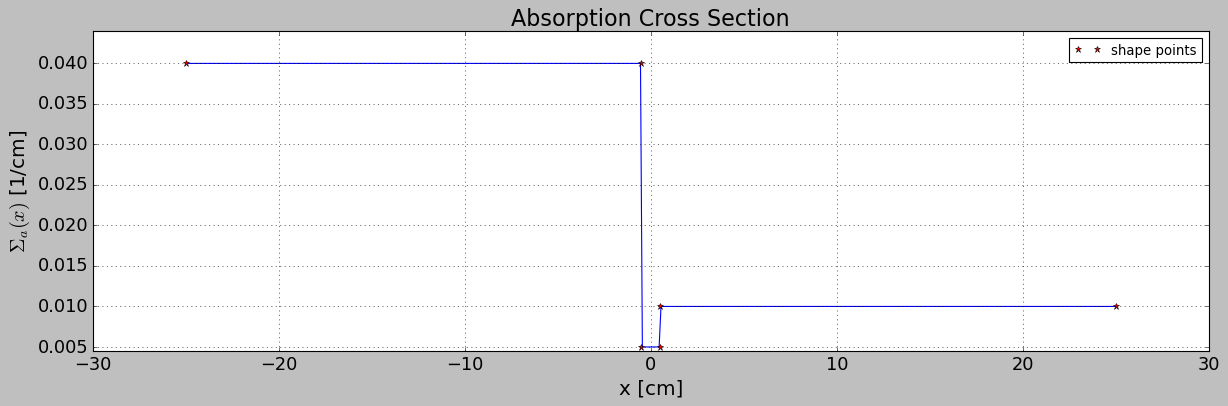

In [59]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

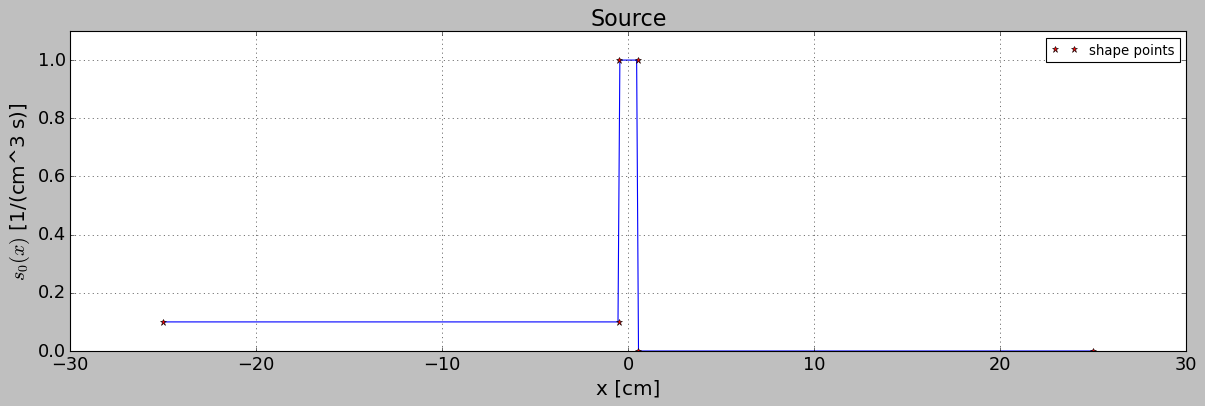

In [60]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-vac"></a>

Specify basis functions distribution on the material domain and degree.

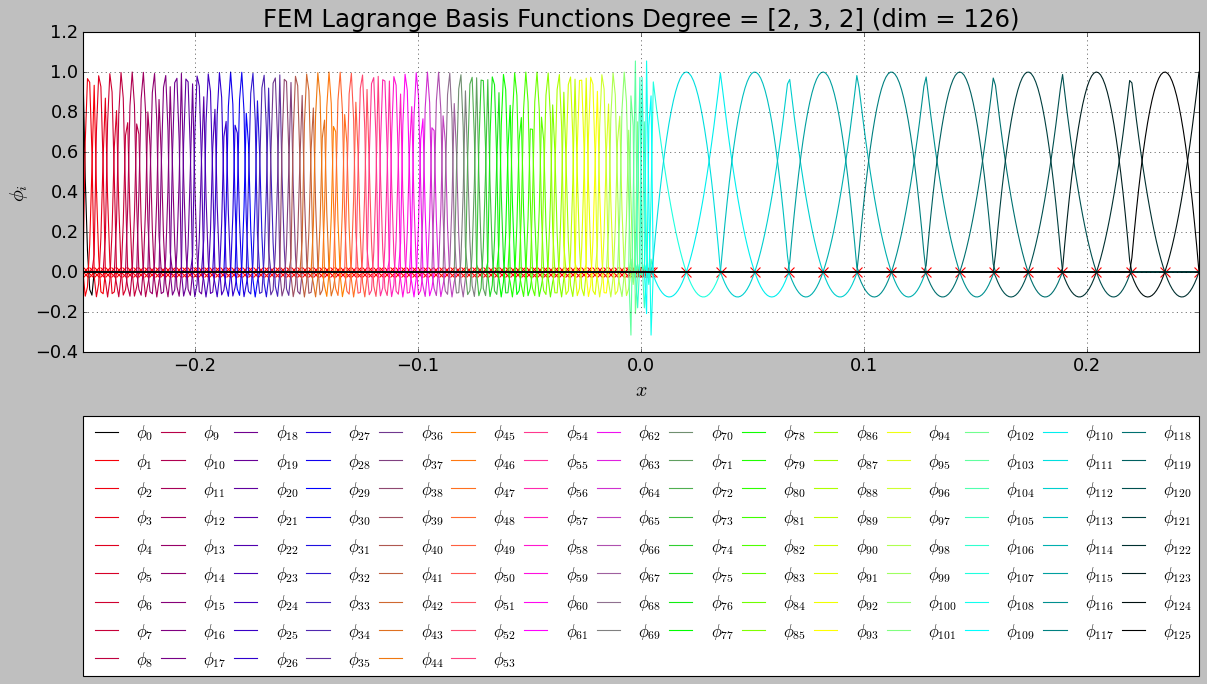

In [73]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [50,3,8] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) + 1/2\,\phi_j(a)\,\phi_i(a) + 1/2\,\phi_j(b)\,\phi_i(b) $

In [92]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

r_mtrx_a = femlb.boundary_inner_product_matrix('left', lambda x:1/2, 'u', 'v')
r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_a + r_mtrx_b

In [93]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i)$

In [94]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
b_vec = s_vec

In [95]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-vac"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

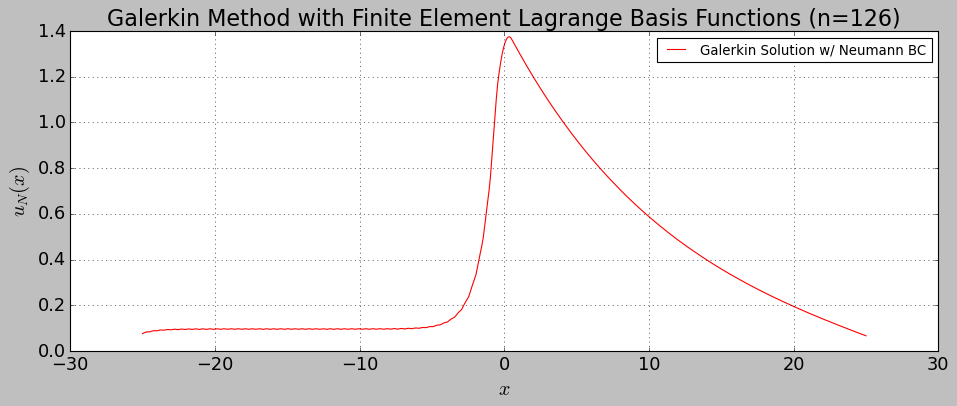

In [96]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label='Galerkin Solution w/ Neumann BC')

plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [97]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [0.07626]   u^*_N(b) [cm^2/s]=  [0.06658]
u^*'_N(a) [cm/s]=  [381.16874]  u^*'_N(b) [cm/s]=  [-236.41097]
u^*_N(0) [cm^2/s]=  [1.33812]
u^*'_N(0) [cm/s]=  [2211.73714]


In [98]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', u_star(x_a)/2*unit.cm**2*unit.second)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  [0.03813]
q_na computed [cm2/s]=  [0.03812]


In [99]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', u_star(x_b)/2*unit.cm**2*unit.second)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  [0.03329]
q_nb computed [cm^2/s]=  [0.0331]


In [82]:
x_vec = np.linspace(x_a, x_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-2.50000e-01   +7.62644e-02     -3.81169e-02
-2.37179e-01   +9.19564e-02     +1.88979e-04
-2.24359e-01   +9.49522e-02     -1.37757e-02
-2.11538e-01   +9.53463e-02     +1.60212e-02
-1.98718e-01   +9.70035e-02     -1.71210e-03
-1.85897e-01   +9.50748e-02     -1.97057e-02
-1.73077e-01   +9.66538e-02     +9.34700e-03
-1.60256e-01   +9.67194e-02     -8.71604e-03
-1.47436e-01   +9.49677e-02     +2.03236e-02
-1.34615e-01   +9.70915e-02     +2.25349e-03
-1.21795e-01   +9.58227e-02     -1.58221e-02
-1.08974e-01   +9.62330e-02     +1.32017e-02
-9.61538e-02   +9.70933e-02     -4.94820e-03
-8.33333e-02   +9.47425e-02     -2.33766e-02
-7.05128e-02   +9.82732e-02     +4.85081e-03
-5.76923e-02   +1.01361e-01     -1.76103e-02
-4.48718e-02   +1.13825e-01     +1.51140e-03
-3.20513e-02   +1.65681e-01     -7.02455e-02
-1.92308e-02   +3.44230e-01     -3.26943e-01
-6.41026e-03   +1.02735e+00     -8.36752e-01
+6.41026e-03   +1.34950e+00     +1.62301e-01
+1.92308

In [83]:
x_vec

array([-0.25   , -0.23718, -0.22436, -0.21154, -0.19872, -0.1859 ,
       -0.17308, -0.16026, -0.14744, -0.13462, -0.12179, -0.10897,
       -0.09615, -0.08333, -0.07051, -0.05769, -0.04487, -0.03205,
       -0.01923, -0.00641,  0.00641,  0.01923,  0.03205,  0.04487,
        0.05769,  0.07051,  0.08333,  0.09615,  0.10897,  0.12179,
        0.13462,  0.14744,  0.16026,  0.17308,  0.1859 ,  0.19872,
        0.21154,  0.22436,  0.23718,  0.25   ])

In [84]:
u_n_vec

array([0.07626, 0.09196, 0.09495, 0.09535, 0.097  , 0.09507, 0.09665,
       0.09672, 0.09497, 0.09709, 0.09582, 0.09623, 0.09709, 0.09474,
       0.09827, 0.10136, 0.11383, 0.16568, 0.34423, 1.02735, 1.3495 ,
       1.20791, 1.08039, 0.96599, 0.86245, 0.7695 , 0.68525, 0.60919,
       0.54034, 0.47765, 0.42085, 0.36874, 0.32115, 0.27722, 0.23654,
       0.19876, 0.16316, 0.12963, 0.0975 , 0.06658])

In [85]:
q_N_vec

array([-3.81169e-02,  1.88979e-04, -1.37757e-02,  1.60212e-02,
       -1.71210e-03, -1.97057e-02,  9.34700e-03, -8.71604e-03,
        2.03236e-02,  2.25349e-03, -1.58221e-02,  1.32017e-02,
       -4.94820e-03, -2.33766e-02,  4.85081e-03, -1.76103e-02,
        1.51140e-03, -7.02455e-02, -3.26943e-01, -8.36752e-01,
        1.62301e-01,  1.46934e-01,  1.31567e-01,  1.18946e-01,
        1.07188e-01,  9.64747e-02,  8.75315e-02,  7.85883e-02,
        7.18171e-02,  6.50872e-02,  5.93962e-02,  5.44263e-02,
        4.97384e-02,  4.61936e-02,  4.26488e-02,  4.00577e-02,
        3.76992e-02,  3.57597e-02,  3.44286e-02,  3.30975e-02])

In [86]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-unsym-vac.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')